In [1]:
#!pip install pymysql
#!pip install mysql-connector 

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')

In [4]:
## Check the number of databases available on the server
cursor=connection.cursor() # helps in executing the statements 
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
## connecting the database  (configure to initiate the connection to mysql)
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
# view tables present in datamites_sql db
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [7]:
query = "select * from data"  # SQL statement to select all fields in 'data' table.
df = pd.read_sql(query,connection) 
display(df)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## Basic analysis

In [8]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
df.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [10]:
row,column=df.shape
print(row,"rows & ",column,"columns")

7422 rows &  9 columns


In [11]:
print("size :",df.size)

size : 66798


In [12]:
df.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


## Data Preprocessing

In [14]:
df.count() # df.notna().sum() both are same..

Created          7422
Product_ID       7422
Source           7422
Mobile           7422
EMAIL            7422
Sales_Agent      7422
Location         7422
Delivery_Mode    7422
Status           7422
dtype: int64

In [15]:
df.isna().sum() # no null value present

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [16]:
df.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [17]:
df.describe(include=['O'])#It will give you info about categorical data/columns

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [18]:
df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')
df['year'] = df['Created'].apply(lambda x: x.year)
df['month'] = df['Created'].apply(lambda x: x.month)

In [19]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,year,month
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,2018,11
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,2018,11
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,2018,11
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,2018,11
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,2018,11
...,...,...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,2018,4
7418,2018-04-28 09:43:00,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,2018,4
7419,2018-04-28 09:20:00,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,2018,4
7420,2018-04-28 08:04:00,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,2018,4


In [20]:
df["Status"]=df["Status"].replace({'Open':"high potential", 'Potential':"high potential",'In Progress Positive':"high potential", 
                                  'Just Enquiry':"high potential",'converted':"high potential",'CONVERTED':"high potential"})
df["Status"]=df["Status"].replace({'Not Responding':"low potential", 'Junk Lead':"low potential",
                                   'In Progress Negative':"low potential", 'LOST':"low potential", 'Long Term':"low potential"})

## Conversion of categorical variables

In [21]:
## categorical data conversion
df.select_dtypes(include="O").columns

Index(['Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

## Label Encoding

In [22]:
from sklearn.preprocessing  import LabelEncoder
lc = LabelEncoder()
df.Source=lc.fit_transform(df.Source)
df.Sales_Agent=lc.fit_transform(df.Sales_Agent)
df.Location=lc.fit_transform(df.Location)
df.Delivery_Mode=lc.fit_transform(df.Delivery_Mode)
df.Status=lc.fit_transform(df.Status)

In [23]:
df.loc[:,['Source', 'Sales_Agent',
          'Location', 'Delivery_Mode','Status']]=\
df.loc[:,['Source', 'Sales_Agent',
          'Location', 'Delivery_Mode','Status']].apply(lc.fit_transform)


In [24]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,year,month
0,2018-11-14 10:05:00,,25,984XXXXXXX,aXXXXXXX@gmail.com,3,0,4,0,2018,11
1,2018-11-14 09:22:00,,25,XXXXXXX,#VALUE!,2,0,4,0,2018,11
2,2018-11-14 09:21:00,,25,XXXXXXX,dXXXXXXX@yahoo.com,2,0,4,0,2018,11
3,2018-11-14 08:46:00,,25,XXXXXXX,wXXXXXXX@gmail.com,2,0,4,0,2018,11
4,2018-11-14 07:34:00,,25,XXXXXXX,cXXXXXXX@gmail.com,2,0,4,0,2018,11
...,...,...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,3,,aXXXXXXX@gmail.com,9,10,3,1,2018,4
7418,2018-04-28 09:43:00,15,3,,#VALUE!,4,11,4,1,2018,4
7419,2018-04-28 09:20:00,5,15,,sXXXXXXX@gmail.com,3,2,0,1,2018,4
7420,2018-04-28 08:04:00,21,2,,YXXXXXXX@gmail.com,7,11,0,0,2018,4


In [25]:
df.shape

(7422, 11)

## Feature Selection¶

<AxesSubplot:>

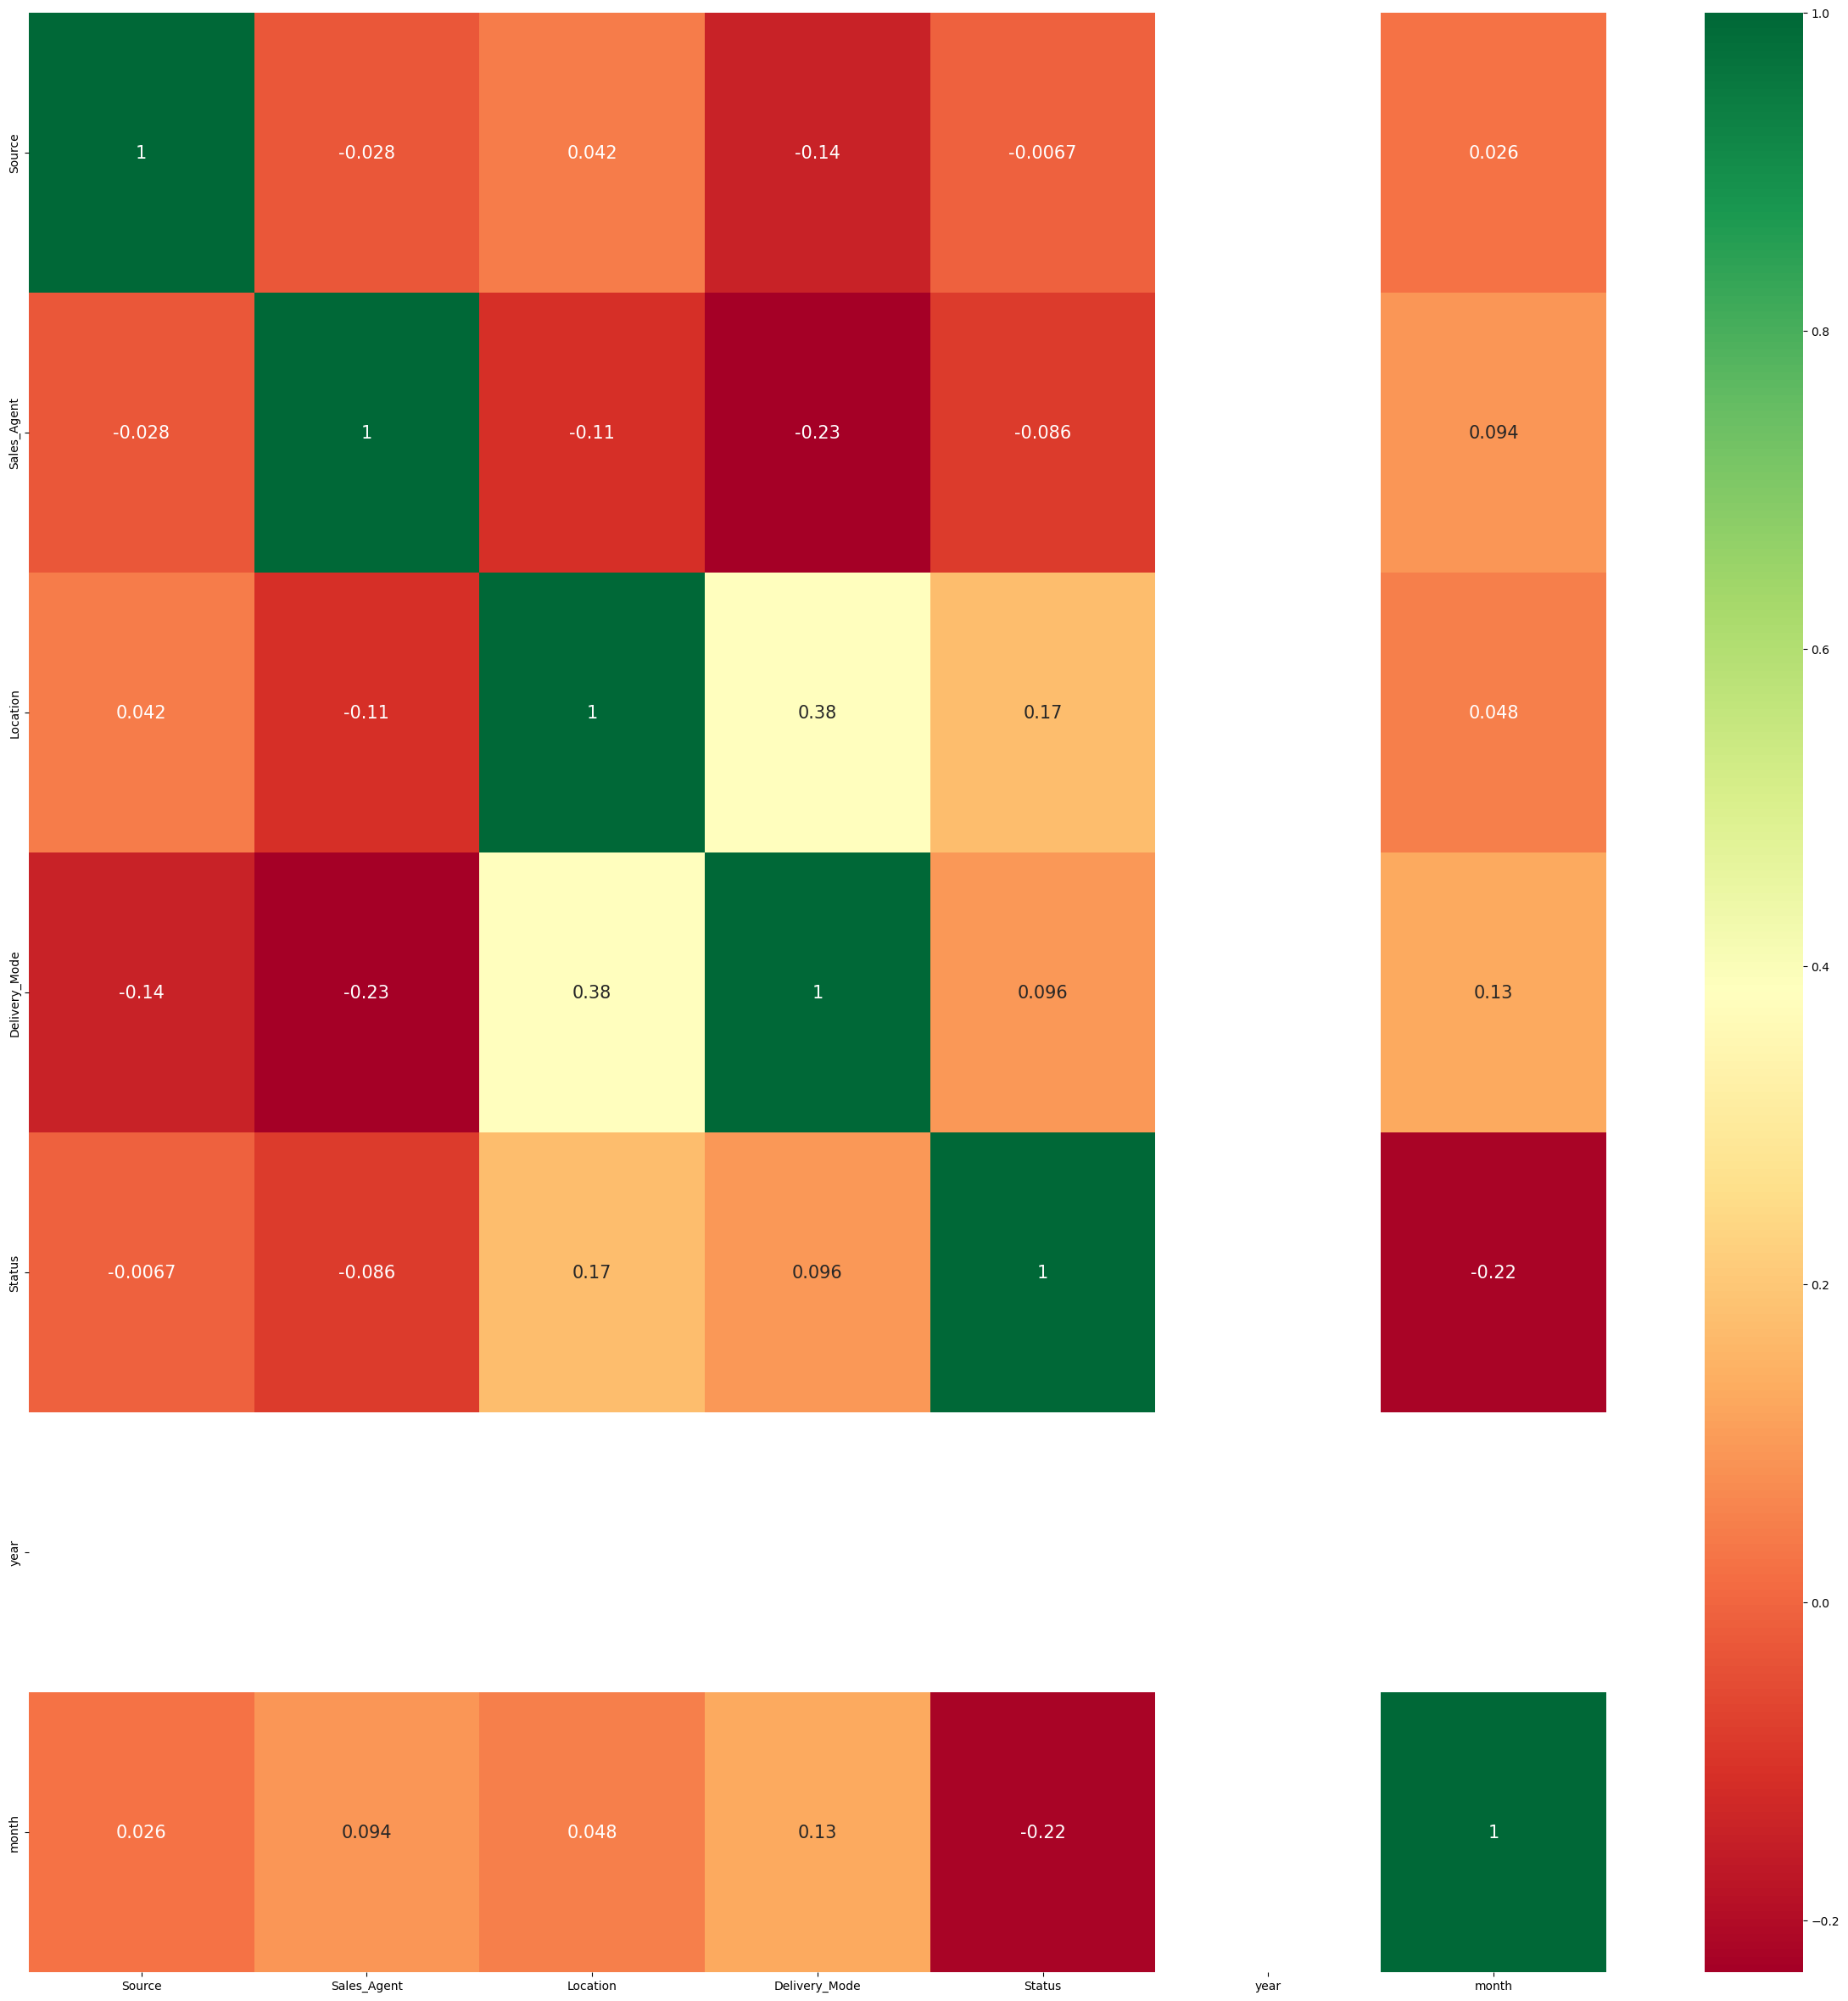

In [26]:
# Checking corelation
plt.figure(figsize=(30,30))#convas size
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',annot_kws={"size":15})#plotting heat map to check the data

In [27]:
df.drop(['Created','Product_ID','Mobile','EMAIL'],axis=1,inplace =True)

In [28]:
df

,Source,Sales_Agent,Location,Delivery_Mode,Status,year,month
0,25,3,0,4,0,2018,11
1,25,2,0,4,0,2018,11
2,25,2,0,4,0,2018,11
3,25,2,0,4,0,2018,11
4,25,2,0,4,0,2018,11
...,...,...,...,...,...,...,...
7417,3,9,10,3,1,2018,4
7418,3,4,11,4,1,2018,4
7419,15,3,2,0,1,2018,4
7420,2,7,11,0,0,2018,4


In [29]:
df.describe()

,Source,Sales_Agent,Location,Delivery_Mode,Status,year,month
count,7422.000000,7422.000000,7422.000000,7422.000000,7422.000000,7422.0,7422.000000
mean,12.595123,6.975344,6.717866,2.108596,0.589733,2018.0,7.499461
std,8.554512,2.874139,4.306309,1.739406,0.491915,0.0,1.877802
min,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0,4.000000
25%,3.000000,5.000000,2.000000,0.000000,0.000000,2018.0,6.000000
50%,15.000000,7.000000,7.000000,2.000000,1.000000,2018.0,7.000000
75%,17.000000,8.000000,11.000000,4.000000,1.000000,2018.0,9.000000
max,25.000000,12.000000,17.000000,4.000000,1.000000,2018.0,11.000000


In [30]:
df

,Source,Sales_Agent,Location,Delivery_Mode,Status,year,month
0,25,3,0,4,0,2018,11
1,25,2,0,4,0,2018,11
2,25,2,0,4,0,2018,11
3,25,2,0,4,0,2018,11
4,25,2,0,4,0,2018,11
...,...,...,...,...,...,...,...
7417,3,9,10,3,1,2018,4
7418,3,4,11,4,1,2018,4
7419,15,3,2,0,1,2018,4
7420,2,7,11,0,0,2018,4


# Model Creation

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
## Creating independent and dependent variable
x = df.drop('Status', axis=1)#independent variable 
x

,Source,Sales_Agent,Location,Delivery_Mode,year,month
0,25,3,0,4,2018,11
1,25,2,0,4,2018,11
2,25,2,0,4,2018,11
3,25,2,0,4,2018,11
4,25,2,0,4,2018,11
...,...,...,...,...,...,...
7417,3,9,10,3,2018,4
7418,3,4,11,4,2018,4
7419,15,3,2,0,2018,4
7420,2,7,11,0,2018,4


In [33]:
y = df.Status #dependent variable 
y

0       0
1       0
2       0
3       0
4       0
       ..
7417    1
7418    1
7419    1
7420    0
7421    0
Name: Status, Length: 7422, dtype: int64

In [45]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [46]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
x_smote,y_smote=sm.fit_resample(x_train,y_train)
print(Counter(y_smote))

Counter({1: 4377, 0: 3045})
Counter({1: 3511, 0: 3511})


In [47]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,classification_report
log = LogisticRegression(penalty='l2', solver="lbfgs", class_weight="balanced")
log.fit(x_smote,y_smote)
y_pred=log.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [85]:
y_train_predict=log.predict(x_smote)
y_train_predict

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [87]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_smote,y_train_predict)

0.6046710338934776

In [88]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.6195286195286195

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       619
           1       0.69      0.63      0.66       866

    accuracy                           0.62      1485
   macro avg       0.61      0.62      0.61      1485
weighted avg       0.63      0.62      0.62      1485



# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model=DecisionTreeClassifier(max_depth=100,min_samples_leaf=7,min_samples_split=8,max_features=6,random_state=3,
                             ccp_alpha=0.003)
model.fit(x_smote,y_smote)
y_pred1=model.predict(x_test)
y_pred1

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [102]:
model.score(x_test,y_test)

0.6612794612794612

In [103]:
model.score(x_smote,y_smote)

0.6442608943320991

In [104]:
accuracy_score(y_smote,model.predict(x_smote))

0.6442608943320991

In [105]:
print(classification_report(y_smote,model.predict(x_smote)))

              precision    recall  f1-score   support

           0       0.72      0.48      0.57      3511
           1       0.61      0.81      0.70      3511

    accuracy                           0.64      7022
   macro avg       0.66      0.64      0.63      7022
weighted avg       0.66      0.64      0.63      7022



# Random Forest